<a href="https://colab.research.google.com/github/Farahi23/Darsman-Task/blob/main/DarsmanTask5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [80]:
df = pd.read_csv('/content/drive/MyDrive/datatsets/loans.csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [87]:
# General data information
df.head()
df.shape
df.columns
df.dtypes
df.info()
df.nunique()
df.describe()
df.corr(numeric_only=True)

df.isnull().sum()               # df has no null value
df.duplicated().sum()           # df has no duplicated values
(df=='?').sum()

df['loan_type'].nunique()
df.value_counts().to_frame()
df['client_id'].value_counts().to_frame()
df['loan_amount'].value_counts().to_frame()
df['repaid'].value_counts().to_frame()
df['loan_id'].value_counts().to_frame()
df['rate'].value_counts().to_frame()

,client_id,loan_amount,repaid,loan_id,rate
client_id,1.000000,0.046507,0.085547,-0.025350,0.058672
loan_amount,0.046507,1.000000,0.012506,0.074782,-0.033340
repaid,0.085547,0.012506,1.000000,-0.076472,-0.016172
loan_id,-0.025350,0.074782,-0.076472,1.000000,0.010918
rate,0.058672,-0.033340,-0.016172,0.010918,1.000000


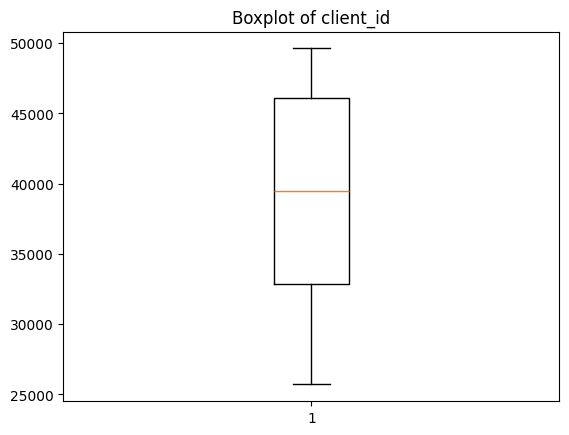

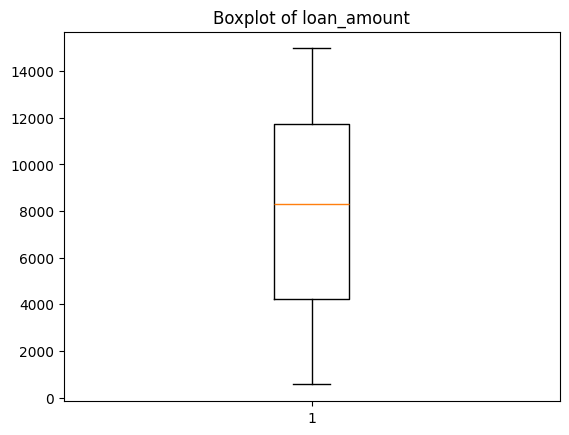

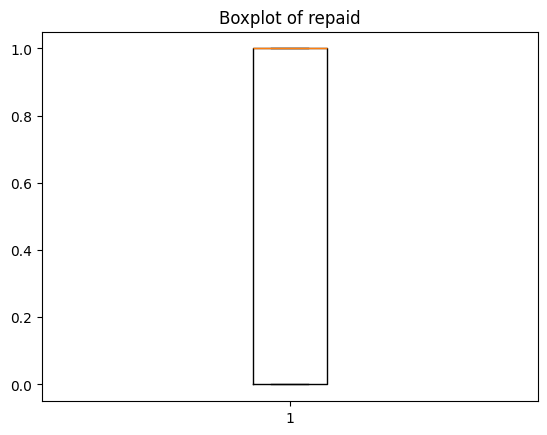

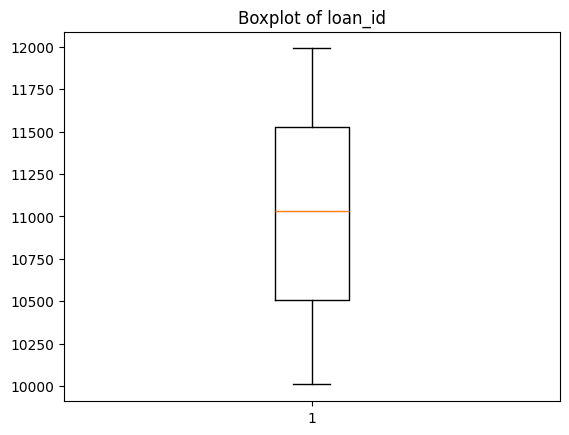

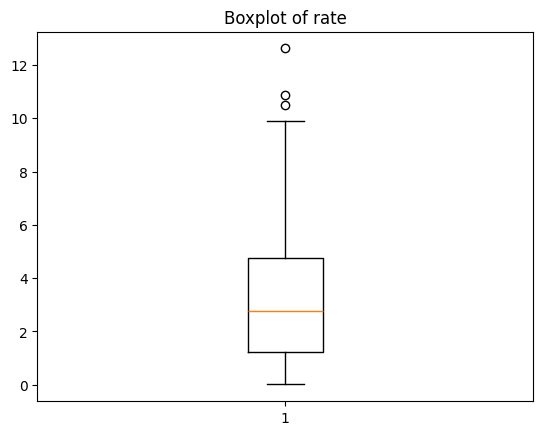

In [26]:
# Finding the Outliners with boxplot
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure()
        plt.boxplot(df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    else: continue

<ipython-input-81-c693947a5814>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


Upper limit: 10.40865868383616
Lower limit: -3.974347171420811


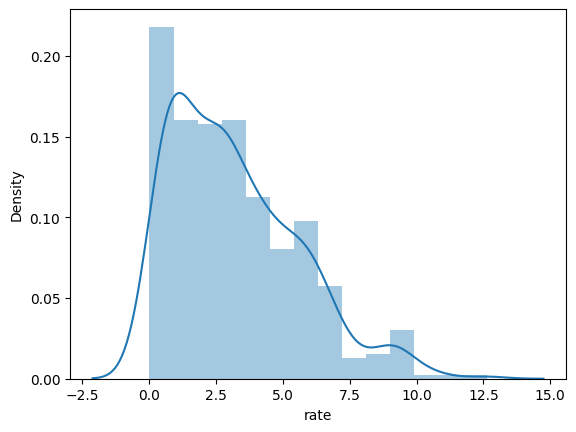

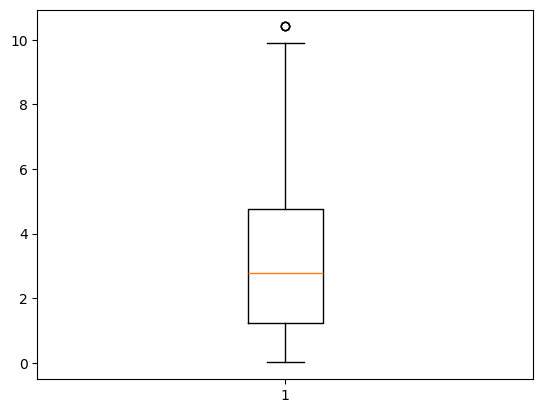

In [81]:
# Preprocessing the outliners using Zscore method
sns.distplot(df['rate'])

upper_limit = df['rate'].mean() + 3 * df['rate'].std()
lower_limit = df['rate'].mean() - 3 * df['rate'].std()
print(f'Upper limit: {upper_limit}')
print(f'Lower limit: {lower_limit}')

# Find the value of outliners
df.loc[(df['rate'] > upper_limit) | (df['rate'] < lower_limit)]

# Change the outliners= values to upper or lower limit values
new_df = df.copy()
new_df.loc[(new_df['rate']>=upper_limit), 'rate'] = upper_limit
new_df.loc[(new_df['rate']<=lower_limit), 'rate'] = lower_limit

plt.figure()
plt.boxplot(new_df['rate'])
plt.show()

In [82]:
# تبذیل هتغیز
new_df['loan_amount'] = np.log1p(new_df['loan_amount'])
new_df['rate'] = np.sqrt(new_df['rate'])

In [83]:
# مقیاسبندی متغیرهای عددی
scaler = StandardScaler()
scaled_columns = ['loan_amount', 'rate']
new_df[scaled_columns] = scaler.fit_transform(new_df[scaled_columns])

In [84]:
# ايجاد متغيرهاى جديد
new_df['loan_start'] = pd.to_datetime(new_df['loan_start'])
new_df['loan_end'] = pd.to_datetime(new_df['loan_end'])
new_df['loan_duration'] = (new_df['loan_end'] - new_df['loan_start']).dt.days
new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_id      443 non-null    int64         
 1   loan_type      443 non-null    object        
 2   loan_amount    443 non-null    float64       
 3   repaid         443 non-null    int64         
 4   loan_id        443 non-null    int64         
 5   loan_start     443 non-null    datetime64[ns]
 6   loan_end       443 non-null    datetime64[ns]
 7   rate           443 non-null    float64       
 8   loan_duration  443 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 31.3+ KB


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration
0,46109,home,1.021015,0,10243,2002-04-16,2003-12-20,-0.267384,613
1,46109,credit,0.561523,0,10984,2003-10-21,2005-07-17,-0.768987,635
2,46109,home,0.923112,1,10990,2006-02-01,2007-07-05,-1.191600,519
3,46109,cash,0.899546,1,10596,2010-12-08,2013-05-05,-0.775441,879
4,46109,credit,1.058484,1,11415,2010-07-07,2012-05-21,0.168883,684


In [85]:
# OneHot encoding of Column loan_type

ohe = OneHotEncoder()
ohe_values = ohe.fit_transform(new_df[['loan_type']]).toarray()
ohe_df = pd.DataFrame(ohe_values, columns=ohe.get_feature_names_out(['loan_type']))
new_df = pd.concat([new_df, ohe_df], axis=1)

new_df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,46109,home,1.021015,0,10243,2002-04-16,2003-12-20,-0.267384,613,0.0,0.0,1.0,0.0
1,46109,credit,0.561523,0,10984,2003-10-21,2005-07-17,-0.768987,635,0.0,1.0,0.0,0.0
2,46109,home,0.923112,1,10990,2006-02-01,2007-07-05,-1.191600,519,0.0,0.0,1.0,0.0
3,46109,cash,0.899546,1,10596,2010-12-08,2013-05-05,-0.775441,879,1.0,0.0,0.0,0.0
4,46109,credit,1.058484,1,11415,2010-07-07,2012-05-21,0.168883,684,0.0,1.0,0.0,0.0


In [86]:
# Dropping uneffective columns Client_id, loan_id, loan_type, loan_start and loan_end
drop_columns = ['client_id', 'loan_id','loan_type', 'loan_start', 'loan_end']
df_ready = new_df.drop(drop_columns, axis=1)

df_ready.head()
df_ready.info()
df_ready.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amount       443 non-null    float64
 1   repaid            443 non-null    int64  
 2   rate              443 non-null    float64
 3   loan_duration     443 non-null    int64  
 4   loan_type_cash    443 non-null    float64
 5   loan_type_credit  443 non-null    float64
 6   loan_type_home    443 non-null    float64
 7   loan_type_other   443 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.8 KB


,loan_amount,repaid,rate,loan_duration,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
loan_amount,1.000000,0.022259,-0.013914,0.003945,0.019821,-0.060313,-0.008420,0.049195
repaid,0.022259,1.000000,-0.017401,0.003723,0.002332,0.039718,-0.088710,0.050292
rate,-0.013914,-0.017401,1.000000,0.036207,-0.032386,0.045095,0.005128,-0.017945
loan_duration,0.003945,0.003723,0.036207,1.000000,0.006413,-0.037413,-0.055379,0.088630
loan_type_cash,0.019821,0.002332,-0.032386,0.006413,1.000000,-0.320414,-0.348060,-0.320414
loan_type_credit,-0.060313,0.039718,0.045095,-0.037413,-0.320414,1.000000,-0.345929,-0.318452
loan_type_home,-0.008420,-0.088710,0.005128,-0.055379,-0.348060,-0.345929,1.000000,-0.345929
loan_type_other,0.049195,0.050292,-0.017945,0.088630,-0.320414,-0.318452,-0.345929,1.000000


In [99]:
# Single Linear Regression
X = new_df[['rate']]
y = new_df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R_squared : {r2}")

R_squared : -0.023824032922366012


In [102]:
# Miltiple Linear Regression
features=['rate', 'loan_duration', 'repaid']
X = new_df[features]
y = new_df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R_squared : {r2}")

R_squared : -0.035796034443362545


In [105]:
# Polynomiad Linear Regression
features=['rate', 'loan_duration', 'repaid']
X = new_df[features]
y = new_df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R_squared : {r2}")

R_squared : -0.08250388342388737
